### Exemplo aplicado a *Multilayer Perceptron*

**Realizando as definições**:

In [18]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from urllib2 import urlopen

import matplotlib.pyplot as plt
%matplotlib inline

**Definição da função para plotar as funções de custo e acurácia**:

In [3]:
def plot_history(h):
    loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Custo não está presente no histórico')
        return
    epochs = range(1, len(history.history[loss_list[0]]) + 1)
    # Custo
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Custo [treinamento] ('.decode('utf-8') + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Custo [validação] ('.decode('utf-8') + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    plt.title('Custo')
    plt.xlabel('Épocas'.decode('utf-8'))
    plt.ylabel('Custo')
    plt.legend()
    # Acurácia
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Acurácia [treinamento] ('.decode('utf-8') + str(format(
                    h.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Acurácia [validação] ('.decode('utf-8') + str(format(
                    h.history[l][-1],'.5f'))+')')
    plt.title('Acurácia'.decode('utf-8'))
    plt.xlabel('Épocas'.decode('utf-8'))
    plt.ylabel('Acurácia'.decode('utf-8'))
    plt.legend()
    plt.show()

**Carregamento da base de dados**:

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
filedata = urlopen(url)
data = filedata.read()
dataset = np.array([s.split(',') for s in data.split('\n')][:-1])

# Transformação dos valores de categórico para numérico
le = LabelEncoder()
features = np.array([le.fit_transform(f) for f in dataset[:, :-1].T]).T

# obtendo a coluna com as respostas
labels = le.fit_transform(dataset[:, -1])
categorical_labels = to_categorical(labels, num_classes=len(set(labels)))

**Dividindo os dados em treino, validação e teste e aplicação do algoritmo**:

Train on 846 samples, validate on 363 samples
Epoch 1/150
846/846 [==============================] - 1s 825us/step - loss: 1.2533 - acc: 0.5449 - val_loss: 0.9948 - val_acc: 0.7107
Epoch 2/150
846/846 [==============================] - 0s 98us/step - loss: 0.9376 - acc: 0.6856 - val_loss: 0.8594 - val_acc: 0.7190
Epoch 3/150
846/846 [==============================] - 0s 94us/step - loss: 0.8466 - acc: 0.6939 - val_loss: 0.7825 - val_acc: 0.7245
Epoch 4/150
846/846 [==============================] - 0s 99us/step - loss: 0.8069 - acc: 0.6891 - val_loss: 0.7640 - val_acc: 0.6997
Epoch 5/150
846/846 [==============================] - 0s 95us/step - loss: 0.7814 - acc: 0.7009 - val_loss: 0.7429 - val_acc: 0.7190
Epoch 6/150
846/846 [==============================] - 0s 97us/step - loss: 0.7566 - acc: 0.7045 - val_loss: 0.7134 - val_acc: 0.7438
Epoch 7/150
846/846 [==============================] - 0s 105us/step - loss: 0.7196 - acc: 0.7388 - val_loss: 0.6704 - val_acc: 0.7741
Epoch 8/150
84

846/846 [==============================] - 0s 110us/step - loss: 0.2466 - acc: 0.9728 - val_loss: 0.2539 - val_acc: 0.9752
Epoch 62/150
846/846 [==============================] - 0s 103us/step - loss: 0.2548 - acc: 0.9645 - val_loss: 0.2649 - val_acc: 0.9642
Epoch 63/150
846/846 [==============================] - 0s 102us/step - loss: 0.2612 - acc: 0.9634 - val_loss: 0.2737 - val_acc: 0.9559
Epoch 64/150
846/846 [==============================] - 0s 102us/step - loss: 0.2519 - acc: 0.9669 - val_loss: 0.2851 - val_acc: 0.9477
Epoch 65/150
846/846 [==============================] - 0s 127us/step - loss: 0.2463 - acc: 0.9716 - val_loss: 0.2473 - val_acc: 0.9780
Epoch 66/150
846/846 [==============================] - 0s 132us/step - loss: 0.2511 - acc: 0.9645 - val_loss: 0.2491 - val_acc: 0.9697
Epoch 67/150
846/846 [==============================] - 0s 132us/step - loss: 0.2905 - acc: 0.9338 - val_loss: 0.2682 - val_acc: 0.9587
Epoch 68/150
846/846 [==============================] - 0s 12

846/846 [==============================] - 0s 103us/step - loss: 0.1908 - acc: 0.9787 - val_loss: 0.2105 - val_acc: 0.9614
Epoch 122/150
846/846 [==============================] - 0s 93us/step - loss: 0.1904 - acc: 0.9799 - val_loss: 0.2072 - val_acc: 0.9697
Epoch 123/150
846/846 [==============================] - 0s 92us/step - loss: 0.1862 - acc: 0.9799 - val_loss: 0.2002 - val_acc: 0.9642
Epoch 124/150
846/846 [==============================] - 0s 90us/step - loss: 0.1971 - acc: 0.9752 - val_loss: 0.2271 - val_acc: 0.9587
Epoch 125/150
846/846 [==============================] - 0s 97us/step - loss: 0.2138 - acc: 0.9622 - val_loss: 0.2011 - val_acc: 0.9725
Epoch 126/150
846/846 [==============================] - 0s 95us/step - loss: 0.1825 - acc: 0.9835 - val_loss: 0.1951 - val_acc: 0.9780
Epoch 127/150
846/846 [==============================] - 0s 101us/step - loss: 0.1879 - acc: 0.9693 - val_loss: 0.2207 - val_acc: 0.9504
Epoch 128/150
846/846 [==============================] - 0s 

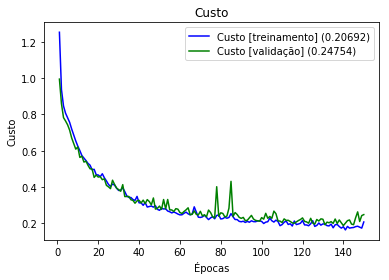

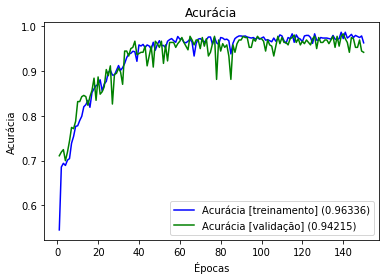

Acurácia: 95.18%
Matriz de confusão:
[[ 97   0  19   0]
 [  2  16   0   0]
 [  1   0 366   0]
 [  3   0   0  15]]

              precision    recall  f1-score   support

           0    0.94175   0.83621   0.88584       116
           1    1.00000   0.88889   0.94118        18
           2    0.95065   0.99728   0.97340       367
           3    1.00000   0.83333   0.90909        18

   micro avg    0.95183   0.95183   0.95183       519
   macro avg    0.97310   0.88893   0.92738       519
weighted avg    0.95208   0.95183   0.95049       519



In [19]:
# Dividindo em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    features, categorical_labels, test_size=0.3)
# treino: 80% dos 80% de treino. teste: 20% dos 80% de treino.
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.3, shuffle=True)

l = 0.01
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=6,
                kernel_regularizer=regularizers.l2(l)))
# model.add(Dropout(0.5))
model.add(Dense(10, activation='relu',
                kernel_regularizer=regularizers.l2(l)))
# model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

sgd = SGD(lr=0.05, momentum=0.0)
adam = Adam(lr=0.005, beta_1=0.9, beta_2=0.999)
model.compile(loss='categorical_crossentropy', optimizer=adam,
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=150, batch_size=15,
                    validation_data=(X_val, y_val))
plot_history(history)
score = model.predict_classes(X_test)
y_true = [np.where(x == 1)[0][0] for x in y_test]
print 'Acurácia: %0.2f%%' % (accuracy_score(y_true, score) * 100)
print 'Matriz de confusão:'
print confusion_matrix(y_true, score)
print
print classification_report(y_true, score, digits=5)